In [1]:
from brian2 import * 
from matplotlib import pyplot as plt
import json, socket, random
from enum import Enum
from topology import topology
import numpy as np
import matplotlib.pyplot as plt 
from random import randint

In [2]:
def run_network(t_run, indices, times):
    
    magic_network.schedule = ['start', 'groups', 'synapses', 'thresholds', 'resets', 'end'] 
    Numero_de_run = 0  
    N = len(topology.keys()) 
    vrest = -70.0*mV 
    tau = 2*ms 
    R = 300*Mohm

    eqs = '''
        dv/dt = ((vrest - v) + R*I)/tau : volt (unless refractory)
        I : amp
        '''

    # Criação dos neurônios comuns (neurons)
    neurons = NeuronGroup(N, eqs, threshold='v>-60.0*mV', reset='v=vrest', refractory=3*ms, method='exact') #method='linear')
    neurons.v = -80*mV
    neurons.I = 0*pA 
    
    inp = SpikeGeneratorGroup(N, indices, times, when='before_synapses')
    Stimulus = Synapses(inp, neurons, on_pre='v_post += 11*mV')
    print(Stimulus)
    for item in range(N):
        Stimulus.connect(i=item, j=item)

    syn = Synapses(neurons, neurons, 'w : volt', on_pre='v_post += w')
    
    for item in range(N): 
        if ("#" + str(item)) in topology:
            info_json = topology[("#" + str(item))]
            if info_json["syns"]:
                info_json_syns = info_json["syns"]
                n_connections = len(info_json_syns)
                for xpto in range(n_connections):
                    liga_json = info_json_syns[xpto][0]
                    delay_json = info_json_syns[xpto][1]
                    w_json = info_json_syns[xpto][2]
                    syn.connect(i=item, j=liga_json) 
                    syn.w[item, liga_json] = w_json*mV
                    syn.delay[item, liga_json] = delay_json*ms

    state_mon = StateMonitor(neurons, 'v', record = True)
    spike_mon_neurons = SpikeMonitor(neurons)
    spike_mon_input = SpikeMonitor(inp)

    net = Network(neurons, inp, Stimulus, syn)
    net.add(state_mon)
    net.add(spike_mon_neurons)  
    net.add(spike_mon_input)
    net.run(t_run)
    
    return spike_mon_neurons, spike_mon_input

In [3]:
config = {
    "randomAll":{
        "rand":[[100,103,106,109], [101,104,107,110], [102,105,108,111]],
        "100": "Nr_movefront",
        "101": "Nr_moveleft",
        "102": "Nr_moveright",
        "103": "Nr_movefront",
        "104": "Nr_moveleft",
        "105": "Nr_moveright",
        "106": "Nr_movefront",
        "107": "Nr_moveleft",
        "108": "Nr_moveright",
        "109": "Nr_movefront",
        "110": "Nr_moveleft",
        "111": "Nr_moveright"
        },
    "randomLF":{
        "rand":[[112,114,116,118], [113,115,117,119]],
        "112": "Nr_moveleft",
        "113": "Nr_movefront",
        "114": "Nr_moveleft",
        "115": "Nr_movefront",
        "116": "Nr_moveleft",
        "117": "Nr_movefront",
        "118": "Nr_moveleft",
        "119": "Nr_movefront"
    },
    "randomRL":{
        "rand":[[112,114,116,118], [113,115,117,119]],
        "112": "Nr_moveright",
        "113": "Nr_moveleft",
        "114": "Nr_moveright",
        "115": "Nr_moveleft",
        "116": "Nr_moveright",
        "117": "Nr_moveleft",
        "118": "Nr_moveright",
        "119": "Nr_moveleft"
    }
}

#### Random Test

In [4]:
def random_choose(rand_nrs, spikemn):
    
    win, lst, next_n = [], [], []
    
    for j in range(len(rand_nrs)):
        win.append(max([i for i, x in enumerate(list(spikemn.i)) if x in rand_nrs[j]]))
        lst = lst + rand_nrs[j]
    
    Nr_win = rand_nrs[win.index(max(win))]
    
    for j in range(len(Nr_win)):
        next_n.append(max([i for i, x in enumerate(list(spikemn.i)) if x == Nr_win[j]]))
    
    winner = Nr_win[next_n.index(max(next_n))]
    
    return Nr_win[next_n.index(max(next_n))]

In [ ]:
t_run = 400*ms
rand_nrs = config['randomAll']['rand']
indices = array([0, 100, 112])
times = array([50, 50, 50])*ms 
spike_mon_neurons, spike_mon_input = run_network(t_run, indices, times)
winner = random_choose(rand_nrs, spike_mon_neurons)
config['randomAll'][str(winner)]

#### Teste em escala

In [30]:
rand_nrs = config['randomAll']['rand']
randn_lst, randn_lst2, index = [100], ["Nr_movefront"], []
l = [100,103,106,109,101,104,107,110,102,105,108,111]
for rodada in range(100):
    t_run = 400*ms
    indices = array([0, random.choice(l), randint(112, 119)])
    #indices = array([0, randint(100, 111), randint(112, 119)])
    index.append([str(indices[1])])
    times = array([50, 50, 50])*ms 
    spike_mon_neurons, spike_mon_input = run_network(t_run, indices, times)
    randn = random_choose(rand_nrs, spike_mon_neurons)
    randn_lst.append(str(randn))
    randn_lst2.append(config['randomAll'][str(randn)])

Synapses(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='synapses')
Synapses(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='synapses')
Synapses(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='synapses')
Synapses(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='synapses')
Synapses(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='synapses')
Synapses(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='synapses')
Synapses(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='synapses')
Synapses(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='synapses')
Synapses(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='synapses')
Synapses(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='synapses')


In [31]:
lists = {
    "index": list(index),
    "winners": list(randn_lst[1:]),
    "moves": list(randn_lst2[1:])
}

with open('data2.json', 'w') as f:
    json.dump(lists, f)

Teste com rand_choose

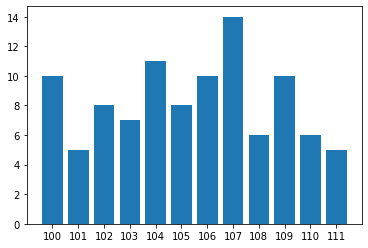

In [32]:
#Spikes de input
labels, counts = np.unique(index,return_counts=True)
ticks = range(len(counts))
plt.bar(ticks,counts, align='center');
plt.xticks(ticks, labels);

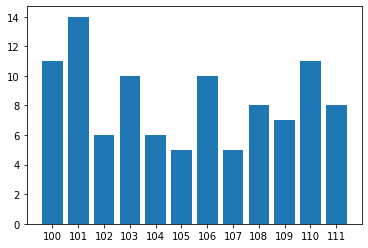

In [33]:
#Winners
labels, counts = np.unique(randn_lst,return_counts=True)
ticks = range(len(counts))
plt.bar(ticks,counts, align='center');
plt.xticks(ticks, labels);

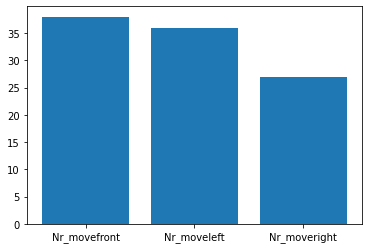

In [34]:
#Moves
labels, counts = np.unique(randn_lst2,return_counts=True)
ticks = range(len(counts))
plt.bar(ticks,counts, align='center');
plt.xticks(ticks, labels);

Teste com rand_int

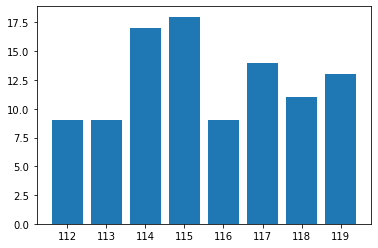

In [27]:
#Spikes de input
labels, counts = np.unique(index,return_counts=True)
ticks = range(len(counts))
plt.bar(ticks,counts, align='center');
plt.xticks(ticks, labels);

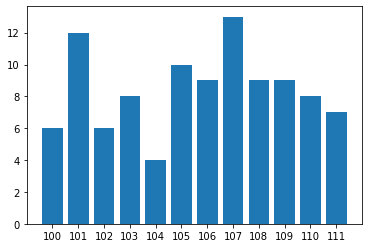

In [28]:
#Winners
labels, counts = np.unique(randn_lst,return_counts=True)
ticks = range(len(counts))
plt.bar(ticks,counts, align='center');
plt.xticks(ticks, labels);

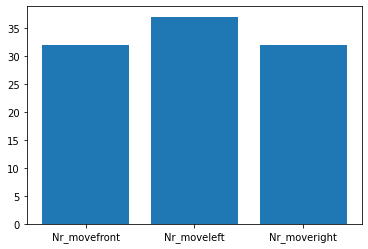

In [29]:
#Moves
labels, counts = np.unique(randn_lst2,return_counts=True)
ticks = range(len(counts))
plt.bar(ticks,counts, align='center');
plt.xticks(ticks, labels);